In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#IMPORTING THE DATASET
data=pd.read_csv('C:/Users/Shris/projects/ML/DATASETS/diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [5]:
#Filling NaN values
data.fillna(value=data.mean(), inplace=True)

In [6]:
#x and y seperation
y=data['Outcome']
X=data.drop('Outcome', axis=1)
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [8]:
#splitting of train and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42, test_size=0.2)


In [9]:
#normalizing X
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)
print(X)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [22]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression, SGDClassifier
clf=LogisticRegression(random_state=42, solver='liblinear')
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score, precision_recall_curve
accuracy_score(y_pred,y_test)

0.7597402597402597

In [25]:
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
y_pred_sgd=sgd_clf.predict(X_test)
accuracy_score(y_pred_sgd,y_test)

0.5064935064935064

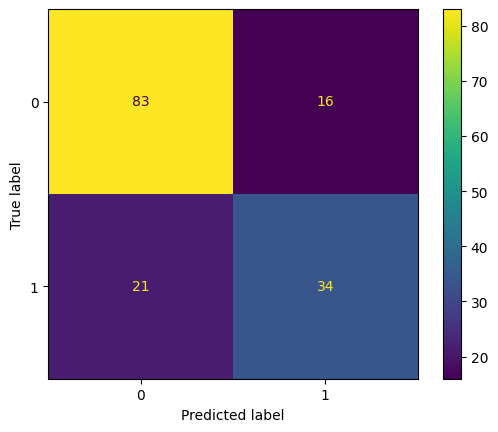

In [20]:
#CM FOR LOGISTIC REGRESSION
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cmd=ConfusionMatrixDisplay(cm).plot()

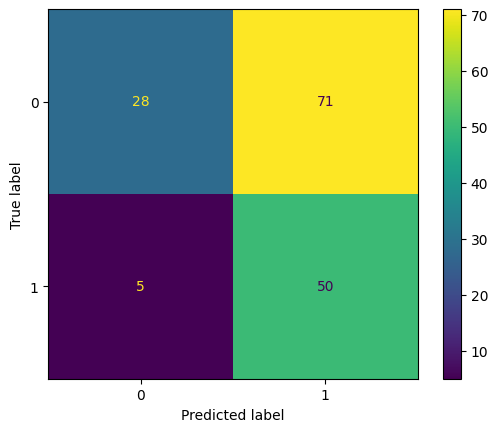

In [26]:
#CM FOR sgd
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cm=confusion_matrix(y_test,y_pred_sgd)
cmd=ConfusionMatrixDisplay(cm).plot()

In [32]:
tp= np.where((y_pred ==1) & (y_test==1))[0][:5]
fp= np.where((y_pred ==1) & (y_test==0))[0][:5]
tn=tp= np.where((y_pred ==0) & (y_test==1))[0][:5]
fn= np.where((y_pred ==0) & (y_test==0))[0][:5]
print(data.iloc[tp], data.iloc[fp], data.iloc[tn], data.iloc[fn], sep='\n')

    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
10            4      110             92              0        0  37.6   
12           10      139             80              0        0  27.1   
15            7      100              0              0        0  30.0   
19            1      115             70             30       96  34.6   
28           13      145             82             19      110  22.2   

    DiabetesPedigreeFunction  Age  Outcome  
10                     0.191   30        0  
12                     1.441   57        0  
15                     0.484   32        1  
19                     0.529   32        1  
28                     0.245   57        0  
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
7            10      115              0              0        0  35.3   
8             2      197             70             45      543  30.5   
9             8      125             96              0        0   0.0   

In [65]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=150,max_depth=3, random_state=0, min_samples_split=3)
rf.fit(X_train, y_train)
rf_pred=rf.predict(X_test)
accuracy_score(rf_pred,y_test)

0.7987012987012987